# Introduction: Understanding the Business Problem

Many policymakers try to find patterns in voting behavior to predict the outcome of certain elections. There are many factors that can influence voting behavior such as income, age, gender, and race demographics.

**Objective:** The goal of this project is to develop a model to **predict whether a county will vote "yes" or "no" to legalizing gaming through a ballot**. We will develop three classification models— Decision Trees (DT), Naïve Bayes (NB), and K-Nearest Neighbors (KNN)— and compare them to find the best model that can predict how a county will vote. Understanding the factors that influence this decision can help policymakers and stakeholders in the gaming industry to better understand public sentiment towards gaming legalization.


# **Data Understanding and Preprocessing**

The data in the GamingBallotDataSet.xsl file contains sufficient information about demographic, economic, and voting-related features for different U.S. counties.
In this step, we loaded the excel file and looked at the contents of the data to better understand the features and their patterns. We first checked for missing values, data types. and converted State No, County No, MSA, Ballot Type, and Dependent Variable binary variables to categorical to ensure the model correctly interprets these variables. The 'County No' column was dropped because it was not relevant to the analysis. We also created visualizations to understand the central tendency, distribution of key variables, and correlations to the target variable ('DEPENDENT VARIABLE).

**Variables:**

State No: ID for state

County No: County ID

FOR: Number of FOR votes

AGAINST: Number of AGAINST votes

TOTAL CASTE: Number of people voted

DEPENDENT VARIABLE: 1:Yes to legalizing gaming; 0:No

BALLOT TYPE: Gaming-related ballots 1:Gambling; 2:Wagering

POPULATION: Population of the county

PCI: Per capita income

MEDIUM FAMILY INCOME: Medium family income

SIZE OF COUNTY: Size of the county (sq. mile)

POPULATION DENSITY: Population density (# of people / sq. mile)

PERCENT WHITE: Racial distribution of the county

PERCENT BLACK: "

PERCENT OTHER: "

PERCENT MALE: Sex distribution of the county

PERCENT FEMALE: "

NO OF CHURCHES: Religious identity of the county

NO OF CHURCH MEMBERS: "

PERCENT CHURCH MEMBERS OF POPULATION: "

POVERTY LEVEL: Poverty level

UNEMPLOYMENT RATE: Unemployment rate

AGE LESS THAN 18: Age distribution of the county

AGE24: "

AGE44: "

AGE64: "

AGE OLDER THAN 65: "

MSA: Metropolitan statistical area - area with relatively high population density at its core and close economic ties throughout the region - 1:Yes; 0:No



**target variable: Dependent Variable**

**1: "Yes" (the county voted to legalize gaming)**

**0: "No" (the county voted against legalizing gaming)**

1. Upload and clean data

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [ ]:
# Read data
gamingBallot = pd.read_excel('/content/drive/MyDrive/IS470_data/GamingBallotDataSet-1.xls')
gamingBallot

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,15607,34618,...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,13740,23114,...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,24187,44874,...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,12816,27359,...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,19017,23054,...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,41,44069,27316,71385,1,1,354527,18893,27622,...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1283,18,42,10026,9755,19781,1,1,53029,20082,33810,...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1284,18,43,126397,76905,203302,1,1,732143,28711,49763,...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1285,18,44,26412,23464,49876,1,1,153293,25791,38751,...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


In [ ]:
# Examine the number of rows and cols
gamingBallot.shape

(1287, 31)

In [ ]:
# Show the head rows of a data frame

gamingBallot.head()

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,15607,34618,...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,13740,23114,...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,24187,44874,...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,12816,27359,...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,19017,23054,...,1.0,1192,220,1231,973,940,2,0.07,1913,2462


In [ ]:
# Show the tail rows of a data frame
gamingBallot.tail()

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
1282,18,41,44069,27316,71385,1,1,354527,18893,27622,...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1283,18,42,10026,9755,19781,1,1,53029,20082,33810,...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1284,18,43,126397,76905,203302,1,1,732143,28711,49763,...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1285,18,44,26412,23464,49876,1,1,153293,25791,38751,...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140
1286,18,45,7099,6291,13390,1,1,59953,16405,26842,...,13.5,19963,5315,16815,11403,6457,1,0.30,17860,33630


In [ ]:
# Examine missing values
gamingBallot.isnull().sum()

,0
State No,0
County No,0
FOR,0
AGAINST,0
TOTAL CASTE,0
DEPENDENT VARIABLE,0
BALLOT TYPE,0
POPULATION,0
PCI,0
MEDIUM FAMILY INCOME,0


In [ ]:
# Drop rows with any missing values
gamingBallot = gamingBallot.dropna()

In [ ]:
gamingBallot.isnull().sum()

,0
State No,0
County No,0
FOR,0
AGAINST,0
TOTAL CASTE,0
DEPENDENT VARIABLE,0
BALLOT TYPE,0
POPULATION,0
PCI,0
MEDIUM FAMILY INCOME,0


In [ ]:
#Remove the unique identifier (County No) from further analysis
gamingBallot = gamingBallot.drop(['County No'], axis=1)

In [ ]:
#Examine Variable Types
gamingBallot.dtypes

,0
State No,int64
FOR,int64
AGAINST,int64
TOTAL CASTE,int64
DEPENDENT VARIABLE,int64
BALLOT TYPE,int64
POPULATION,int64
PCI,int64
MEDIUM FAMILY INCOME,int64
SIZE OF COUNTY,float64


In [ ]:
#Change following categorical binary variables to 'category' for clarity
gamingBallot['MSA'] = gamingBallot['MSA'].astype('category')
gamingBallot['BALLOT TYPE'] = gamingBallot['BALLOT TYPE'].astype('category')
gamingBallot['DEPENDENT VARIABLE'] = gamingBallot['DEPENDENT VARIABLE'].astype('category')
gamingBallot['State No'] = gamingBallot['State No'].astype('category')

In [ ]:
#Examine variable types
gamingBallot.dtypes

,0
State No,category
FOR,int64
AGAINST,int64
TOTAL CASTE,int64
DEPENDENT VARIABLE,category
BALLOT TYPE,category
POPULATION,int64
PCI,int64
MEDIUM FAMILY INCOME,int64
SIZE OF COUNTY,float64


In [ ]:
# Display all numeric variables
gamingBallot.select_dtypes(include=['number'])

,FOR,AGAINST,TOTAL CASTE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,...,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,42385,22992,65377,265038,15607,34618,1192.0,223.29,0.75,0.03,...,10.4,5.0,80600,22627,94724,46933,20154,0.25,67087,189448
1,2015,1852,3867,13617,13740,23114,722.8,18.81,0.59,0.00,...,24.8,7.0,4285,1861,4092,2114,1265,0.40,3379,8184
2,51959,48406,100365,391511,24187,44874,803.2,490.34,0.85,0.06,...,5.9,3.0,111243,29574,150740,70783,29171,0.15,99954,301480
3,957,856,1813,5345,12816,27359,1349.4,3.99,0.74,0.00,...,16.9,5.0,1647,229,1670,1178,621,0.26,1799,3340
4,942,1129,2071,4556,19017,23054,2555.9,1.77,0.93,0.00,...,19.0,1.0,1192,220,1231,973,940,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,44069,27316,71385,354527,18893,27622,4839.4,74.68,0.49,0.01,...,27.9,15.6,124607,30781,100927,62657,35555,0.50,98212,201854
1283,10026,9755,19781,53029,20082,33810,2274.5,23.17,0.87,0.03,...,14.8,8.0,11972,3497,16099,12015,9446,0.13,21461,32198
1284,126397,76905,203302,732143,28711,49763,2208.4,334.27,0.62,0.02,...,10.3,5.6,208062,65744,235177,146412,76748,0.38,223160,470354
1285,26412,23464,49876,153293,25791,38751,1022.9,152.51,0.65,0.02,...,15.8,5.4,39727,23948,46570,27627,15421,0.35,43048,93140


In [ ]:
#Display all categorical variables
gamingBallot.select_dtypes(include=['category'])

,State No,DEPENDENT VARIABLE,BALLOT TYPE,MSA
0,1,1,1,1
1,1,1,1,2
2,1,1,1,1
3,1,1,1,2
4,1,0,1,2
...,...,...,...,...
1282,18,1,1,1
1283,18,1,1,2
1284,18,1,1,1
1285,18,1,1,1


In [ ]:
gamingBallot.describe()

,FOR,AGAINST,TOTAL CASTE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,POPULATION DENSITY,PERCENT WHITE,PERCENT BLACK,...,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
count,1286.000000,1286.000000,1286.000000,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,...,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000
mean,6465.933904,7336.199844,13802.133748,5.251575e+04,16648.147745,27404.821151,1000.132893,81.636680,0.804841,0.080791,...,17.403266,6.053344,14430.429238,5208.827372,16509.853810,10306.873250,6759.629082,0.195136,17066.502333,33019.707621
std,14771.605181,15104.097226,28440.284141,1.097707e+05,3825.843445,6402.720662,778.993028,221.833205,0.188693,0.133618,...,7.213993,3.410090,30496.334639,11703.829589,37271.698562,20954.492025,13512.361322,0.188642,34060.324946,74543.397124
min,70.000000,46.000000,116.000000,3.270000e+02,5720.000000,12225.000000,120.800000,0.358435,0.026427,0.000000,...,3.200000,0.600000,87.000000,16.000000,108.000000,71.000000,21.000000,0.001887,92.000000,216.000000
25%,812.000000,909.250000,1823.750000,6.565750e+03,14203.500000,22916.750000,534.125000,7.041071,0.701401,0.001324,...,12.100000,3.600000,1791.000000,418.750000,1725.250000,1329.750000,1110.250000,0.040167,2431.250000,3450.500000
50%,1849.000000,2017.500000,3992.000000,1.617400e+04,16170.000000,26510.000000,831.550000,22.600102,0.860000,0.015520,...,16.150000,5.400000,4571.000000,1305.500000,4556.500000,3288.500000,2401.000000,0.140000,5784.500000,9113.000000
75%,4677.250000,6028.750000,10769.250000,4.313850e+04,18576.000000,31070.250000,1138.700000,64.935289,0.959992,0.095941,...,21.400000,7.600000,12020.000000,4121.000000,12610.750000,8954.500000,5815.250000,0.298599,14980.000000,25221.500000
max,161415.000000,121925.000000,245523.000000,1.206243e+06,44518.000000,55643.000000,6347.800000,3404.480000,0.998113,0.798239,...,49.900000,38.500000,353009.000000,137916.000000,437537.000000,202133.000000,122335.000000,0.973573,324468.000000,875074.000000


In [ ]:
# Calculate the correlation matrix
gamingBallot.corr()

,State No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
State No,1.000000,0.024048,0.004069,0.014652,-0.109403,0.334559,0.000978,-0.006883,0.035653,-0.187770,...,0.101994,-0.001958,0.002815,-0.001997,0.002246,-0.008244,-0.001293,0.057932,-0.001889,-0.001997
FOR,0.024048,1.000000,0.812408,0.950845,0.109862,-0.169088,0.864440,0.446137,0.413764,0.045184,...,0.032309,0.797472,0.796949,0.834095,0.831227,0.766240,-0.527078,0.092348,0.815367,0.834095
AGAINST,0.004069,0.812408,1.000000,0.953038,-0.115229,-0.266107,0.829106,0.476721,0.451722,0.043351,...,0.011551,0.739565,0.717441,0.762922,0.804353,0.793142,-0.533762,-0.024146,0.809506,0.762922
TOTAL CASTE,0.014652,0.950845,0.953038,1.000000,-0.004135,-0.229147,0.889304,0.484897,0.454806,0.046491,...,0.022915,0.806968,0.794947,0.838394,0.858908,0.819200,-0.557230,0.035141,0.853407,0.838394
DEPENDENT VARIABLE,-0.109403,0.109862,-0.115229,-0.004135,1.000000,0.162675,0.055455,-0.086420,-0.002025,0.064425,...,0.006931,0.065751,0.069783,0.062848,0.023617,-0.013062,-0.074132,0.257972,0.009348,0.062848
BALLOT TYPE,0.334559,-0.169088,-0.266107,-0.229147,0.162675,1.000000,-0.158555,-0.292027,-0.231650,-0.181512,...,-0.077277,-0.151295,-0.122107,-0.144200,-0.190382,-0.204203,0.110660,0.147796,-0.198137,-0.144200
POPULATION,0.000978,0.864440,0.829106,0.889304,0.055455,-0.158555,1.000000,0.399023,0.395105,0.069367,...,0.068878,0.944550,0.934754,0.946163,0.943299,0.871969,-0.574396,0.134386,0.926260,0.946163
PCI,-0.006883,0.446137,0.476721,0.484897,-0.086420,-0.292027,0.399023,1.000000,0.720942,0.020621,...,-0.244005,0.343281,0.329794,0.377785,0.408153,0.388806,-0.331388,-0.353857,0.405349,0.377785
MEDIUM FAMILY INCOME,0.035653,0.413764,0.451722,0.454806,-0.002025,-0.231650,0.395105,0.720942,1.000000,-0.003204,...,-0.239561,0.360813,0.332021,0.383879,0.382038,0.292955,-0.492467,-0.346920,0.351257,0.383879
SIZE OF COUNTY,-0.187770,0.045184,0.043351,0.046491,0.064425,-0.181512,0.069367,0.020621,-0.003204,1.000000,...,0.091433,0.090225,0.054222,0.055170,0.059448,0.058102,0.044960,0.075723,0.059623,0.055170


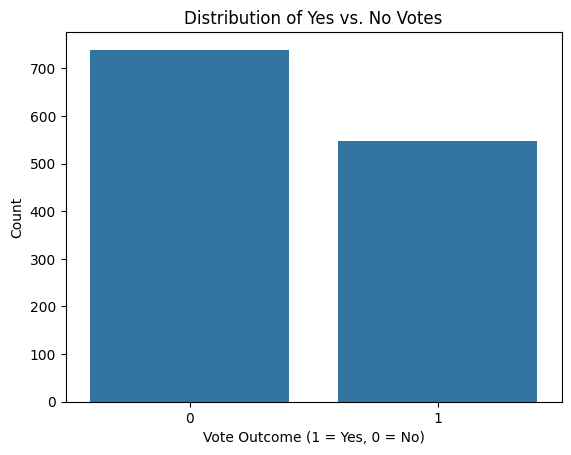

In [ ]:
#Countplot of categorical target variable: DEPENDENT VARIABLE'
sns.countplot(x='DEPENDENT VARIABLE', data=gamingBallot)
plt.title('Distribution of Yes vs. No Votes')
plt.xlabel('Vote Outcome (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

**Countplot for DEPENDENT VARIABLE:**
This countplot shows the overall distribution of the dependent variable.  This visualization tells us that this data is not balanced. Majority of the counties voted against the legalization of gaming. Later on, we will balance the data to ensure our model is not biased toward the majority class.

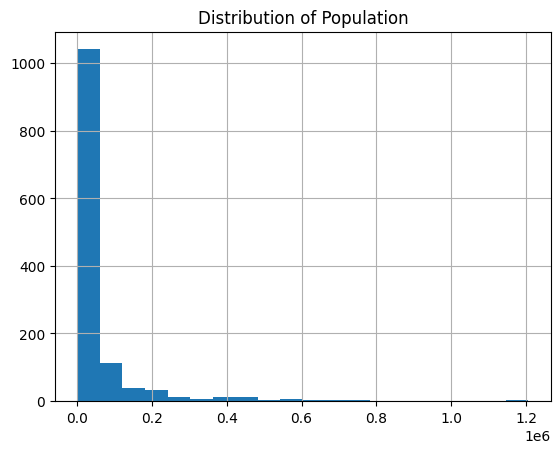

In [ ]:
#histogram for population
gamingBallot['POPULATION'].hist(bins=20)
plt.title('Distribution of Population')
plt.show()

**Histogram of POPULATION:**
This chart shows that majority of the counties in this dataset have a smaller population.  It is extremely skewed to the right. We can also infer the distribution of counties who voted for or against legalization would be right skewed. We can identify  some outliers at the 1.2 mark of the graph, as well.

Text(0.5, 0, 'Vote Outcome (1 = Yes, 0 = No)')

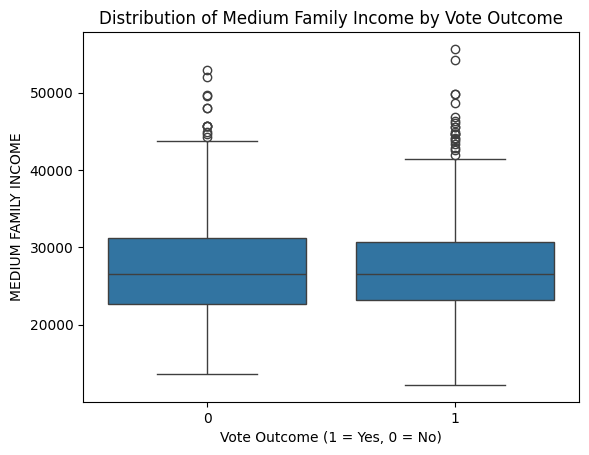

In [ ]:
#Boxplot for medium family income based on if they voted outcome (dependent variable)
sns.boxplot(x='DEPENDENT VARIABLE', y='MEDIUM FAMILY INCOME', data=gamingBallot)
plt.title('Distribution of Medium Family Income by Vote Outcome')
plt.xlabel('Vote Outcome (1 = Yes, 0 = No)')

**Boxplot for 'MEDIUM FAMILY INCOME':**
Boxplot shows the five-number summary for the variable. In this case, the median for meduim family income based on voting outcome is similar for both 'Yes' and 'No' outcomes. This explains that the median middle family income for many of the counties is around 27,000 for the whole data set. We also see quite a few outliers for medium family income. Some counties have a higher medium family income (some exceeding $50,000).


Text(0.5, 0, 'Vote Outcome (1 = Yes, 0 = No)')

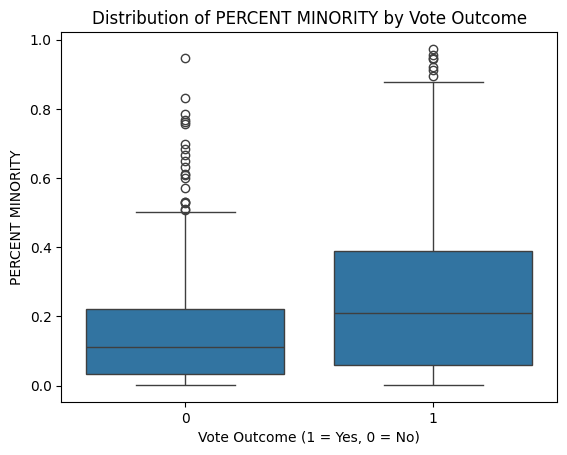

In [ ]:
# Boxplot of the percent minority who voted yes
sns.boxplot(x='DEPENDENT VARIABLE', y='PERCENT MINORITY', data=gamingBallot)
plt.title('Distribution of PERCENT MINORITY by Vote Outcome')
plt.xlabel('Vote Outcome (1 = Yes, 0 = No)')

**Boxplot Distribution of PERCENT MINORITY by Vote Outcome:**
This boxplot shows an interesting correlation between percent minority and voting outcome. The IQR is also larger for the percent minority in counties who voted 'Yes'. This means there is a high variance in percent minority in these counties. The median shows that counties with a higher percent minority (0.2) tend to vote 'Yes' to legalizing gaming. There are also a couple of outliers of counties who voted 'No' to legalizing gaming and have a high percent minority. We can infer there are cultural factors that may play a role in how the county will vote.

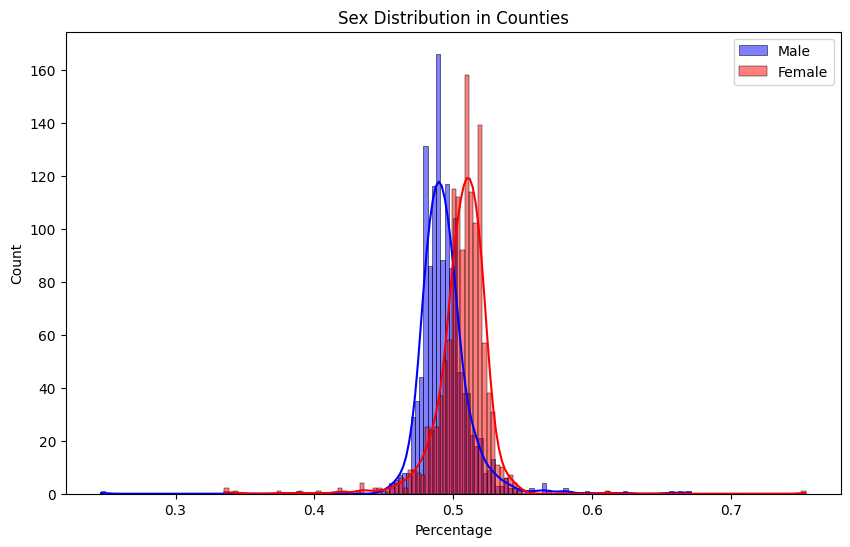

In [ ]:
#histogram of males and females in counties

plt.figure(figsize=(10, 6))
sns.histplot(gamingBallot['PERCENT MALE'], kde=True, color='blue', label='Male')
sns.histplot(gamingBallot['PERCENT FEMALE'], kde=True, color='red', label='Female')

plt.title('Sex Distribution in Counties')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.legend()
plt.show()



**Histogram of Sex Distribution:**
This chart shows the distribution of percent male and female in counties. There is a normal distribution between the sexes. This means this data has counties with similar percentages of male and females in each county.

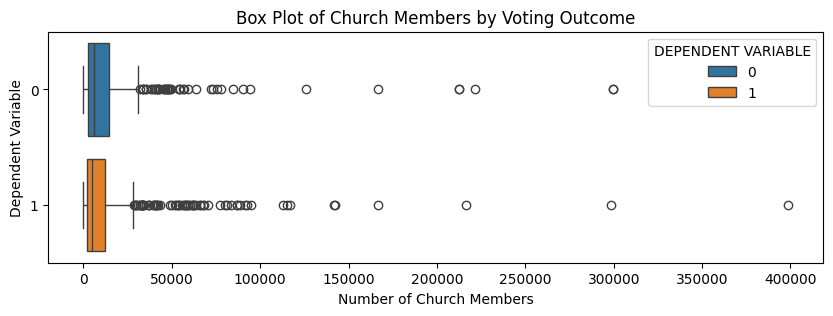

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='NO OF CHURCH MEMBERS' , y='DEPENDENT VARIABLE', hue='DEPENDENT VARIABLE', data=gamingBallot)
plt.title('Box Plot of Church Members by Voting Outcome')
plt.xlabel('Number of Church Members')
plt.ylabel('Dependent Variable')
plt.show()



**Boxplot of Church Members and Voting Outcomes:**
This boxplot shows the central tendency for the number of church members across all counties is less than 10,000. However there are many outliers for each. There is no clear pattern that shows counties with high numbers of church members will vote 'Yes' or 'No' to legalizing voting.

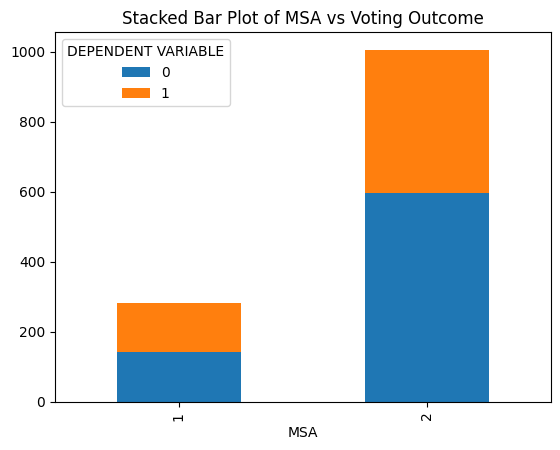

In [ ]:
pd.crosstab(gamingBallot['MSA'], gamingBallot['DEPENDENT VARIABLE']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of MSA vs Voting Outcome')
plt.show()


**Stacked Bar Chart:**
This barchart shows the breakdown of voting outcomes within metropolitan areas. These areas tend to have higher population, and economic ties in the region. On the x-axis, 1 means the county is not a MSA and 2 means it is a MSA. This shows that majority od of the dataset lives in a MSA, however there is no particular trend in the voting behaviors. Both bars have around half of the counties voting 'No' to legalizing gaming.

In [ ]:
#Remove "cheating variables" from further analysis
gamingBallot = gamingBallot.drop(['FOR', 'AGAINST','TOTAL CASTE'], axis=1)

In [ ]:
#Remove redundant variables
gamingBallot = gamingBallot.drop(['PERCENT BLACK', 'PERCENT FEMALE','NO OF OLDER', 'NO OF CHURCH MEMBERS'], axis=1)

In the gamingBallot data set, there were only 2 missing values in Number of Church Members and Percent of Church Member. To deal with this missingness, the rows with missing variables were removed. The dataset contained mostly binary and numeric features, however we changed the binary categorical features to 'category'. The visualizations show the distribution of the data set. There are many outliers in these charts and **the data is not balanced**. 'FOR', 'AGAINST', and 'TOTAL CASTE variables were removed from further analysis because they are considered as cheating variables, variables that directly provide information about the dependent variable. These variables would lead to unrealistically high performance conlusions if used as predictors in the model. 'PERCENT BLACK', 'PERCENT FEMALE', 'NO OF OLDER', 'NO OF CHURCH MEMBERS' were also dropped from further analysis because of multicolinearity with its corresponding variables (ex. Percent White/Other, Percent Male, Percent Church Members, No of Younger).

# **Model Development**

In Model Development stage, we will pick desired columns that will determine what features will be used to train the model. The desired columns for this dataset are 'State No', 'BALLOT TYPE', 'POPULATION', 'PCI',
                   'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY',
                   'POPULATION DENSITY', 'PERCENT WHITE', 'PERCENT OTHER',
                   'PERCENT MALE',
                   'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
                   'UNEMPLOYMENT RATE', 'AGE24', 'AGE44',
                   'AGE64', 'AGE OLDER THAN 65', 'MSA'. 'NO of Churches' and 'Age Less than 18' were dropped because they seemed redundent and populations under 18 would not be able to vote in the election. We will balance the data and split it into test and train sets to train decision- tree, naive-bayes, and K-NN models.

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
gamingBallot.keys()

Index(['State No', 'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT OTHER', 'PERCENT MALE', 'NO OF CHURCHES',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF YOUNGER'],
      dtype='object')

In [ ]:
#Select Desired Columns only

desired_columns = ['State No', 'BALLOT TYPE', 'POPULATION', 'PCI',
                   'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY',
                   'POPULATION DENSITY', 'PERCENT WHITE', 'PERCENT OTHER',
                   'PERCENT MALE',
                   'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
                   'UNEMPLOYMENT RATE', 'AGE24', 'AGE44',
                   'AGE64', 'AGE OLDER THAN 65', 'MSA', 'DEPENDENT VARIABLE']

gamingBallot = gamingBallot[desired_columns]


In [ ]:
# Make a copy of the data
gamingBallot = gamingBallot.copy()

In [ ]:
# Examine the porportion of target variable for data set
target = gamingBallot['DEPENDENT VARIABLE']
print(target.value_counts(normalize=True))

DEPENDENT VARIABLE
0    0.57465
1    0.42535
Name: proportion, dtype: float64


In [ ]:
# Partition the data
from sklearn.model_selection import train_test_split
predictors = gamingBallot.drop(['DEPENDENT VARIABLE'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(900, 18) (386, 18) (900,) (386,)


In [ ]:
target_test.head()

,DEPENDENT VARIABLE
806,1
647,0
501,1
204,0
1210,1


In [ ]:
target_train.head()

,DEPENDENT VARIABLE
182,0
532,1
943,0
507,1
1082,0


In [ ]:
predictors_test.head()

,State No,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,POPULATION DENSITY,PERCENT WHITE,PERCENT OTHER,PERCENT MALE,PERCENT CHURCH MEMBERS OF POPULATION,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
806,13,1,2327,18168,24691,530.3,4.388082,0.994545,0.005455,0.494335,0.49,13.9,3.7,110,559,520,591,2
647,10,1,68460,23641,37557,531.4,128.829507,0.950783,0.038728,0.473326,0.30,7.1,3.5,6130,21188,14085,8999,2
501,9,2,3132,9670,17671,1363.5,2.297030,0.468391,0.505428,0.506573,0.18,26.5,6.4,217,753,669,718,2
204,4,2,6171,15317,23016,1874.2,3.292605,0.993355,0.005835,0.508752,0.50,16.1,4.2,284,1477,1495,1364,2
1210,17,2,5536,12379,17240,458.7,12.068890,0.352548,0.007589,0.480484,0.55,29.8,9.4,538,1478,1040,963,2


In [ ]:
predictors_train.head()

,State No,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,POPULATION DENSITY,PERCENT WHITE,PERCENT OTHER,PERCENT MALE,PERCENT CHURCH MEMBERS OF POPULATION,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
182,4,2,6816,14153,21021,1388.6,4.908541,0.581450,0.418550,0.505724,0.32,28.3,10.5,519,1625,1304,990,2
532,9,2,7750,13232,21245,910.1,8.515548,0.647438,0.304555,0.476921,0.52,23.1,8.0,549,1911,1518,1632,2
943,15,2,188180,17653,36682,558.0,337.210000,0.870000,0.100000,0.500000,0.27,11.9,3.5,27585,62904,33723,13951,1
507,9,2,5403,9438,17620,1489.0,3.628610,0.208626,0.781748,0.496003,0.18,35.2,7.8,503,1464,932,713,2
1082,16,1,8278,20011,28010,1289.0,6.510000,0.950000,0.040000,0.480000,0.55,15.5,3.0,1057,1805,1859,1869,2


In [ ]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,State No,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,POPULATION DENSITY,PERCENT WHITE,PERCENT OTHER,PERCENT MALE,PERCENT CHURCH MEMBERS OF POPULATION,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
0,0.0,0.0,0.219510,0.254833,0.515754,0.172025,0.065489,0.744657,0.226167,0.588112,0.089968,0.154176,0.116095,0.163967,0.216300,0.231919,0.164601,0.0
1,0.0,0.0,0.011021,0.206712,0.250795,0.096676,0.005420,0.579995,0.411212,0.576335,0.172728,0.462527,0.168865,0.013379,0.009108,0.010111,0.010171,1.0
2,0.0,0.0,0.324387,0.475978,0.751969,0.109587,0.143938,0.847571,0.092523,0.569268,0.142632,0.057816,0.063325,0.214344,0.344358,0.349952,0.238321,0.0
3,0.0,0.0,0.004161,0.182896,0.348565,0.197302,0.001067,0.734366,0.267288,0.621088,0.207432,0.293362,0.116095,0.001545,0.003571,0.005479,0.004905,1.0
4,0.0,0.0,0.003507,0.342724,0.249413,0.391055,0.000415,0.929902,0.071962,0.585756,0.210856,0.338330,0.010554,0.001479,0.002567,0.004464,0.007513,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,1.0,0.0,0.293719,0.339528,0.354623,0.757765,0.021833,0.477081,0.503735,0.593539,0.125025,0.528908,0.395778,0.223096,0.230481,0.309737,0.290515,0.0
1282,1.0,0.0,0.043703,0.370174,0.497144,0.345865,0.006701,0.868154,0.102803,0.657710,0.075870,0.248394,0.195251,0.025243,0.036557,0.059111,0.077056,1.0
1283,1.0,0.0,0.606855,0.592582,0.864572,0.335250,0.098090,0.610869,0.370091,0.610134,0.075870,0.152034,0.131926,0.476635,0.537388,0.724238,0.627295,0.0
1284,1.0,0.0,0.126846,0.517320,0.610945,0.144869,0.044696,0.641743,0.339250,0.589342,0.056207,0.269807,0.126649,0.173546,0.106216,0.136374,0.125905,0.0


In [ ]:
import pandas as pd
combined_train_df = pd.concat([predictors_train, target_train], axis=1)
print(combined_train_df['DEPENDENT VARIABLE'].value_counts())


DEPENDENT VARIABLE
0    529
1    371
Name: count, dtype: int64


In [ ]:
# Balance train data

# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['DEPENDENT VARIABLE'] == 0]
minority_df = combined_train_df[combined_train_df['DEPENDENT VARIABLE'] == 1]

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['DEPENDENT VARIABLE'])
target_train = balanced_data['DEPENDENT VARIABLE']

# Examine the proportion of the target variable for the train set
print(target_train.value_counts(normalize=True))

DEPENDENT VARIABLE
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
combined_train_df['DEPENDENT VARIABLE'] == 'Y'

,DEPENDENT VARIABLE
182,False
532,False
943,False
507,False
1082,False
...,...
764,False
836,False
1217,False
560,False


In [ ]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

DEPENDENT VARIABLE
0    0.5
1    0.5
Name: proportion, dtype: float64 (742,)


In [ ]:
# Examine the porportion of target variable for test set
print(target_test.value_counts(normalize=True))

DEPENDENT VARIABLE
0    0.544041
1    0.455959
Name: proportion, dtype: float64


In [ ]:
predictors_train.head()

,State No,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,SIZE OF COUNTY,POPULATION DENSITY,PERCENT WHITE,PERCENT OTHER,PERCENT MALE,PERCENT CHURCH MEMBERS OF POPULATION,POVERTY LEVEL,UNEMPLOYMENT RATE,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA
988,15,2,15779,15180,26505,595.0,26.570000,0.880000,0.110000,0.500000,0.50,17.5,9.1,1140,4256,3525,2584,2
516,9,2,224093,16429,27550,899.6,249.102935,0.674105,0.246385,0.492544,0.39,21.0,5.4,36005,69031,36434,22692,1
885,14,2,4641,16496,25405,376.2,12.336523,0.964040,0.035745,0.483204,0.47,9.1,4.9,228,1173,1017,1079,2
780,13,1,1899,14314,21419,735.8,2.580864,0.960575,0.019712,0.502397,0.54,14.8,3.6,83,437,443,473,2
380,9,2,25190,12119,23293,880.2,28.618496,0.438957,0.531346,0.494649,0.22,28.2,7.2,2704,7316,4264,2964,2


The data is now balanced and has been split into testing and training sets. We also narrowed the desired columns to only include impactful variables by removing 'Age less than 18' and 'No of Churches'. The religious identity of the county can be represented by the 'Percent of Church Members of Population'. MinMax Normalization to scale the values of features to a fixed range, between 0 and 1. This ensures that features with different ranges don't disproportionately influence the models. The data is ready to be used to develop the model.

# **Results and Model Evaluation**

## Decision- Tree Model

Decison-Tree model is a rule-based classification model which relies on entropy reduction to decide which features to use at each decision node. It is important to have a large enough max_depth to capture the details of the data, but we have to be careful to not overfit the model to the training data. Through trial and error (max_depth = 3, 5, 8, 10), max_depth=5 resulted in a tree that was not overfit or underfit. For each model the evaluation is done on the test and train data to ensure there the model is not overfit or underfit.

In [ ]:
# Build a decision tree model on training data with max_depth = 5
model_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
model_DT.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [ ]:
predictors_train.columns


Index(['State No', 'BALLOT TYPE', 'POPULATION', 'PCI', 'MEDIUM FAMILY INCOME',
       'SIZE OF COUNTY', 'POPULATION DENSITY', 'PERCENT WHITE',
       'PERCENT OTHER', 'PERCENT MALE', 'PERCENT CHURCH MEMBERS OF POPULATION',
       'POVERTY LEVEL', 'UNEMPLOYMENT RATE', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA'],
      dtype='object')

[Text(0.2916666666666667, 0.9166666666666666, 'State No <= 2.5\nentropy = 1.0\nsamples = 742\nvalue = [371, 371]\nclass = No'),
 Text(0.125, 0.75, 'PCI <= 28186.5\nentropy = 0.213\nsamples = 89\nvalue = [3, 86]\nclass = Yes'),
 Text(0.20833333333333334, 0.8333333333333333, 'True  '),
 Text(0.08333333333333333, 0.5833333333333334, 'SIZE OF COUNTY <= 2472.35\nentropy = 0.156\nsamples = 88\nvalue = [2, 86]\nclass = Yes'),
 Text(0.041666666666666664, 0.4166666666666667, 'entropy = 0.0\nsamples = 79\nvalue = [0, 79]\nclass = Yes'),
 Text(0.125, 0.4166666666666667, 'AGE OLDER THAN 65 <= 929.5\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]\nclass = Yes'),
 Text(0.08333333333333333, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Yes'),
 Text(0.16666666666666666, 0.25, 'PERCENT CHURCH MEMBERS OF POPULATION <= 0.136\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = No'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.2083333333

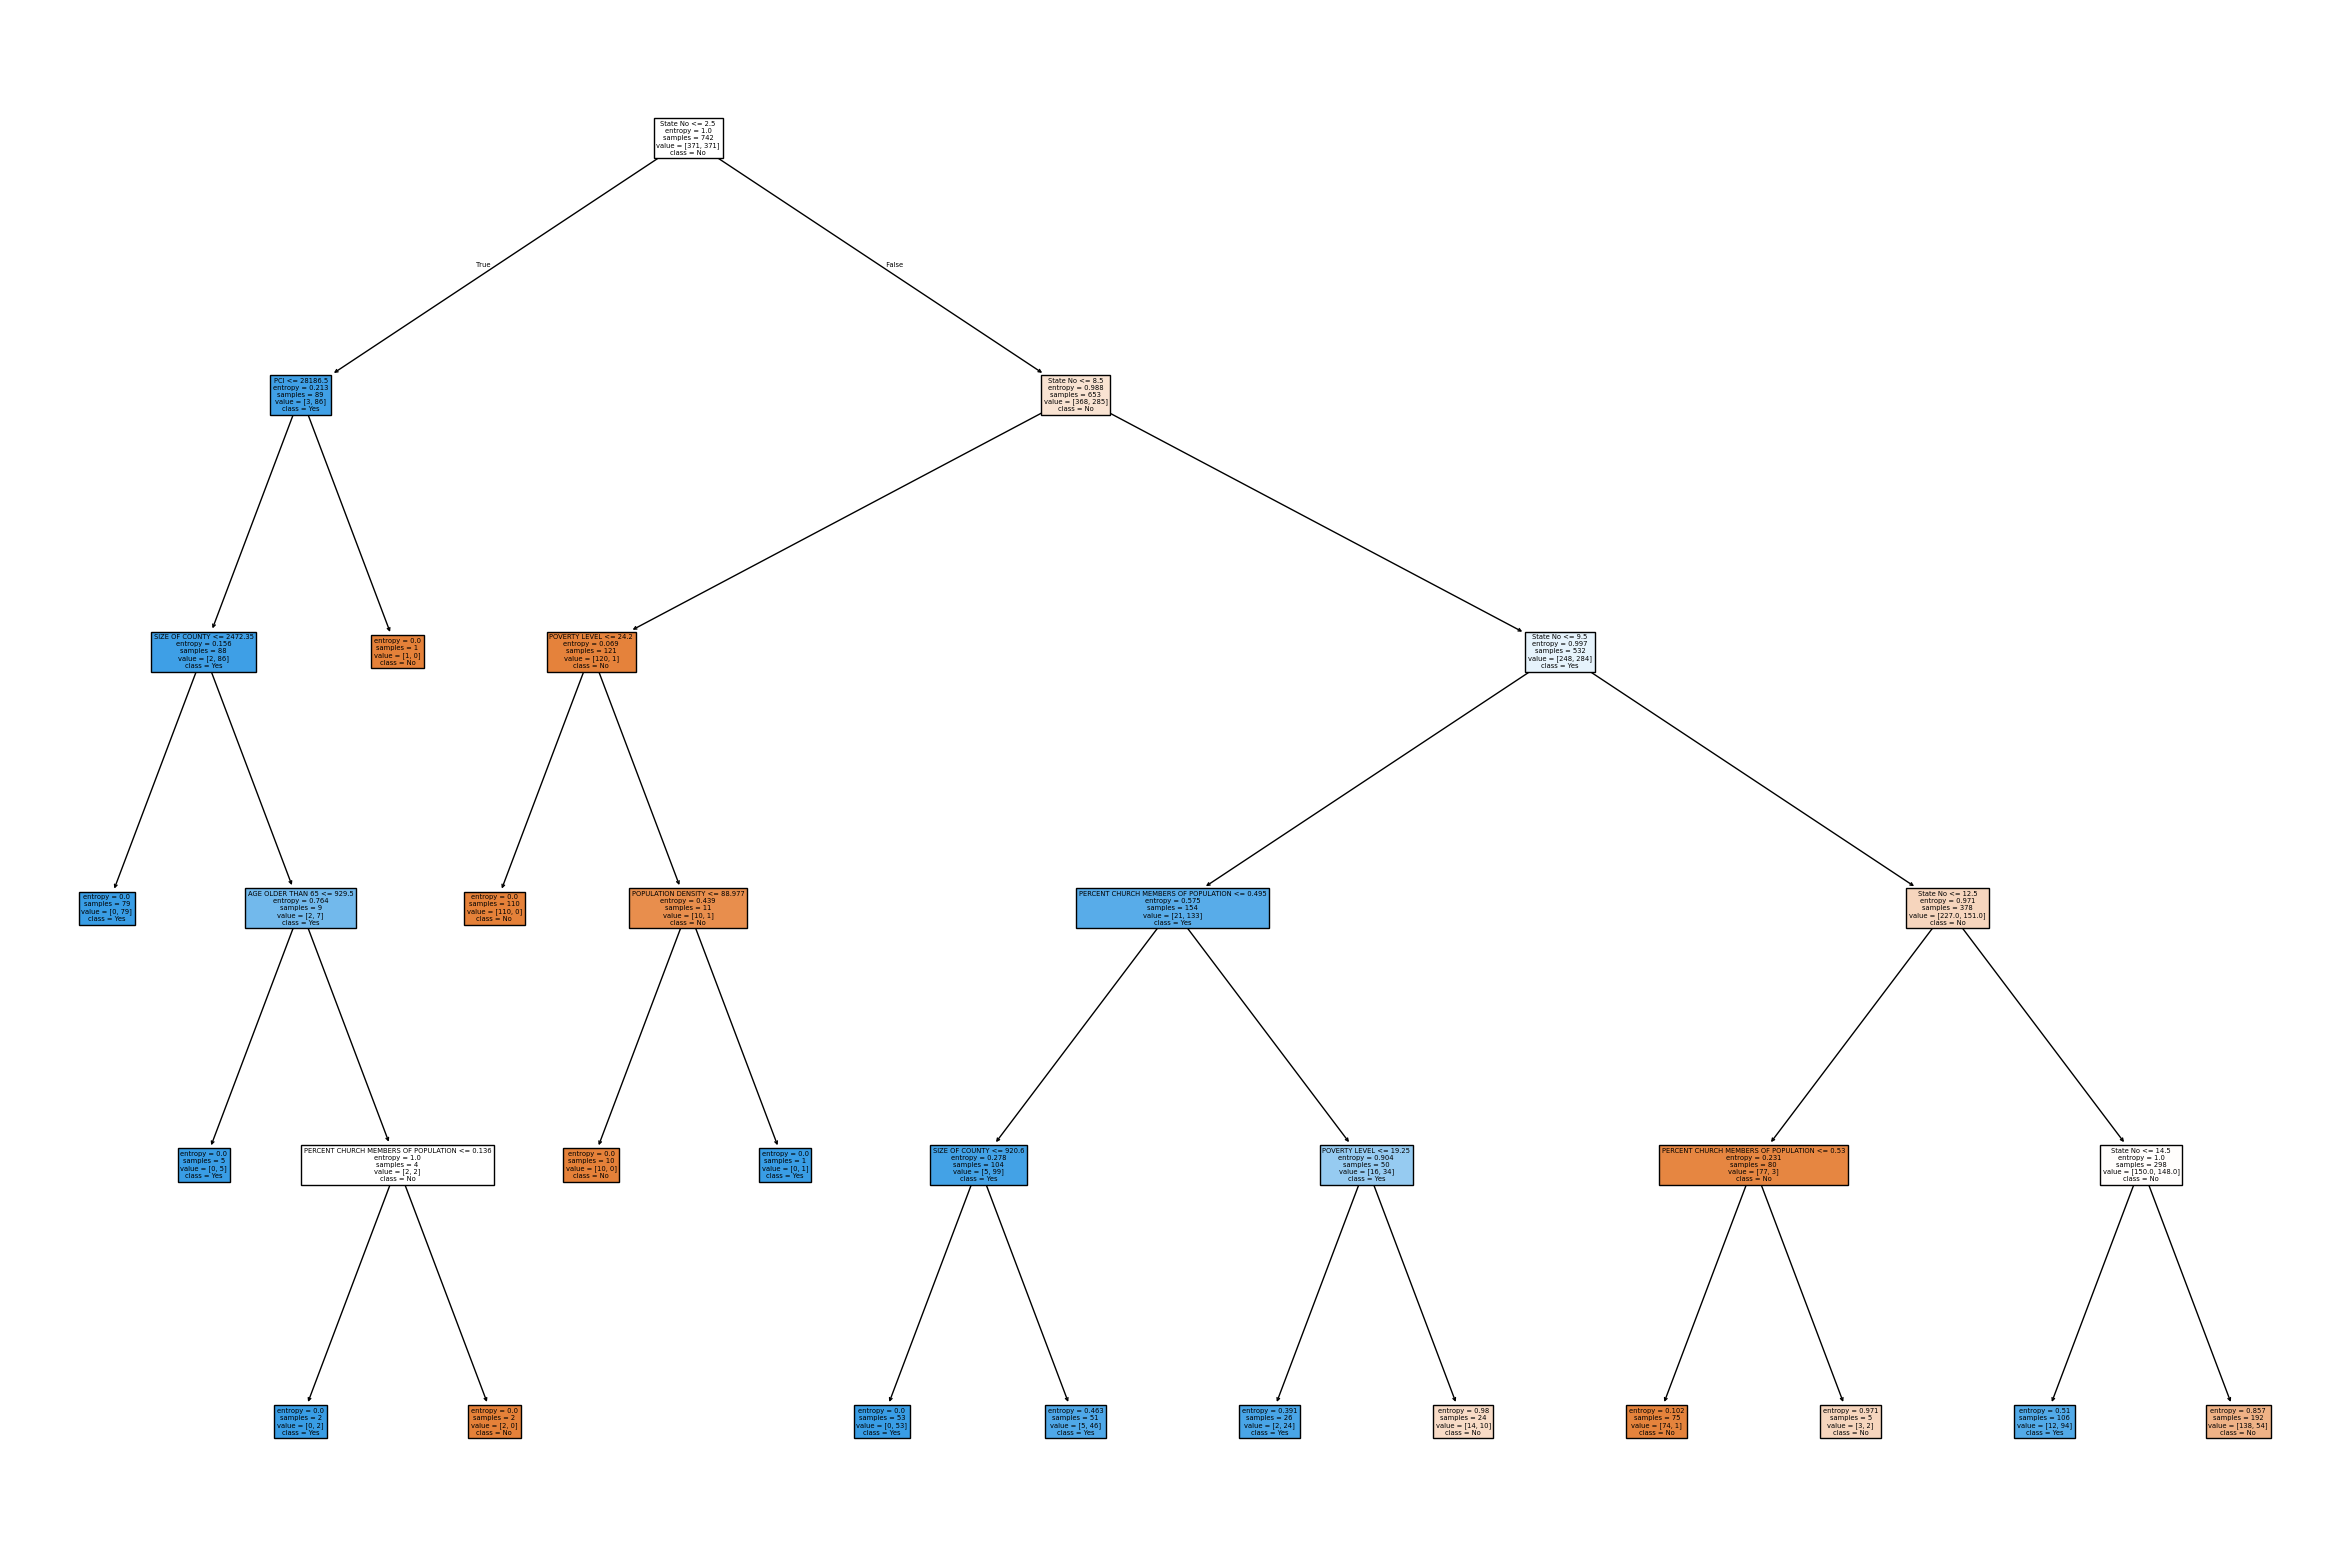

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_DT,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Text version of decision tree
print(tree.export_text(model_DT, feature_names=list(gamingBallot.columns)[1:]))

|--- BALLOT TYPE <= 2.50
|   |--- MEDIUM FAMILY INCOME <= 28186.50
|   |   |--- POPULATION DENSITY <= 2472.35
|   |   |   |--- class: 1
|   |   |--- POPULATION DENSITY >  2472.35
|   |   |   |--- MSA <= 929.50
|   |   |   |   |--- class: 1
|   |   |   |--- MSA >  929.50
|   |   |   |   |--- POVERTY LEVEL <= 0.14
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- POVERTY LEVEL >  0.14
|   |   |   |   |   |--- class: 0
|   |--- MEDIUM FAMILY INCOME >  28186.50
|   |   |--- class: 0
|--- BALLOT TYPE >  2.50
|   |--- BALLOT TYPE <= 8.50
|   |   |--- UNEMPLOYMENT RATE <= 24.20
|   |   |   |--- class: 0
|   |   |--- UNEMPLOYMENT RATE >  24.20
|   |   |   |--- PERCENT WHITE <= 88.98
|   |   |   |   |--- class: 0
|   |   |   |--- PERCENT WHITE >  88.98
|   |   |   |   |--- class: 1
|   |--- BALLOT TYPE >  8.50
|   |   |--- BALLOT TYPE <= 9.50
|   |   |   |--- POVERTY LEVEL <= 0.50
|   |   |   |   |--- POPULATION DENSITY <= 920.60
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- POPUL

In [ ]:
#Make prediction on training data
prediction_on_train_DT = model_DT.predict(predictors_train)

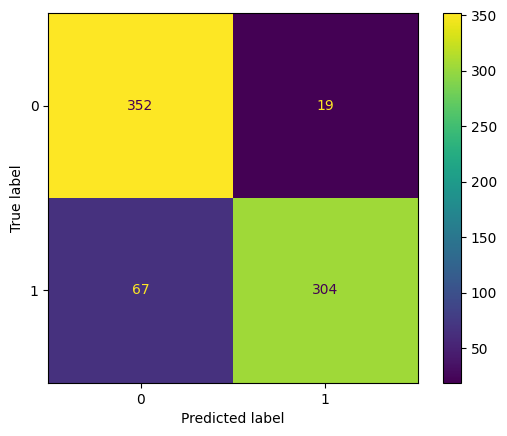

In [ ]:
#Examine evaluation results on training data: confusion Matrix'
cm_DT = confusion_matrix(target_train, prediction_on_train_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_DT.classes_).plot()

In [ ]:
#Examine the evaluation results on training data: accuracy, precision, recall, f1
print(classification_report(target_train, prediction_on_train_DT))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       371
           1       0.94      0.82      0.88       371

    accuracy                           0.88       742
   macro avg       0.89      0.88      0.88       742
weighted avg       0.89      0.88      0.88       742



In [ ]:
# Make predictions on testing data
prediction_on_test_DT = model_DT.predict(predictors_test)


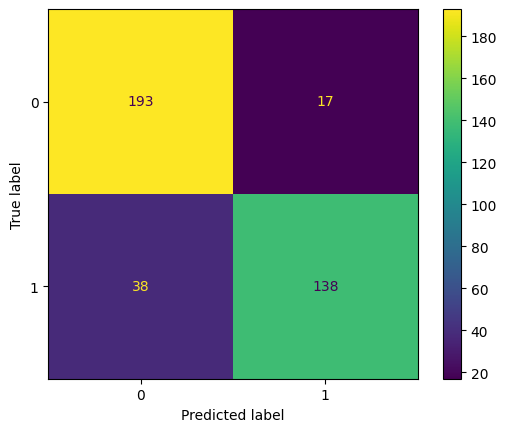

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm_DT = confusion_matrix(target_test, prediction_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_DT.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_DT))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       210
           1       0.89      0.78      0.83       176

    accuracy                           0.86       386
   macro avg       0.86      0.85      0.85       386
weighted avg       0.86      0.86      0.86       386



## Naive Bayes

Naive Bayes model is a simple classification model that uses principles of conditional probability and assumes all the features are independent of each other.

In [ ]:
# Build a Naive Bayes model on training data with default setting (1 point)
model_NB = MultinomialNB()
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [ ]:
# Make predictions on traing and testing data

prediction_on_train_NB = model_NB.predict(predictors_train)
prediction_on_test_NB = model_NB.predict(predictors_test)

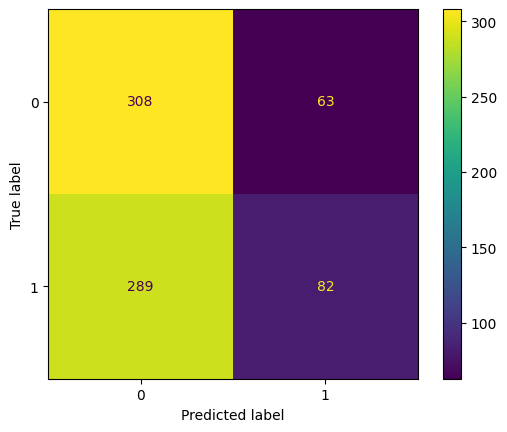

In [ ]:
#Examine the evaluation results on train:confusion matric
cm_NB = confusion_matrix(target_train, prediction_on_train_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
#plot_confusion_matrix


In [ ]:
# Examine the evaluation results on training data: accuracy
print(classification_report(target_train, prediction_on_train_NB))

              precision    recall  f1-score   support

           0       0.52      0.83      0.64       371
           1       0.57      0.22      0.32       371

    accuracy                           0.53       742
   macro avg       0.54      0.53      0.48       742
weighted avg       0.54      0.53      0.48       742



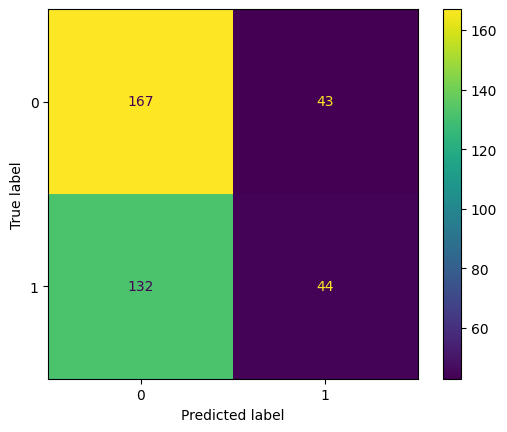

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')


In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test_NB))

              precision    recall  f1-score   support

           0       0.56      0.80      0.66       210
           1       0.51      0.25      0.33       176

    accuracy                           0.55       386
   macro avg       0.53      0.52      0.50       386
weighted avg       0.53      0.55      0.51       386



## K-NN Model

The last classification model in this project is the K-NN model. The K-NN model algorithm predicts outcomes based on the data points ***k*** nearest neighbors. Through trial and error, k= 5 seemed to be the optimal k for this dataset. Using a small k can risk the model to be overfit. This model was evaluated on the train data aswell to ensure the model is not overfit.

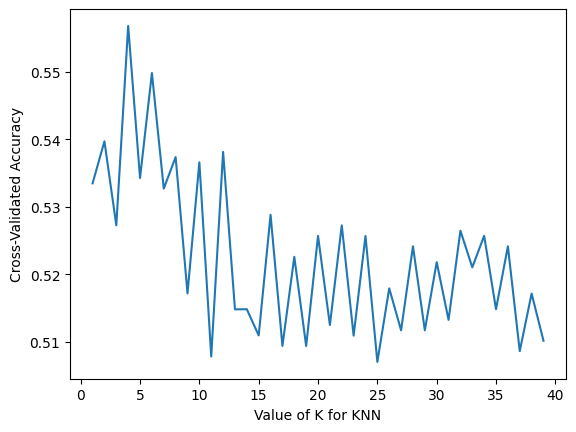

The optimal k is 4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data (X for features, y for target)
X = gamingBallot.drop(columns=['DEPENDENT VARIABLE'])
y = gamingBallot['DEPENDENT VARIABLE']

# Range of k values to try
k_range = range(1, 40)

# Empty list to store cross-validation scores for each k
cv_scores = []

# Perform cross-validation for each k and calculate the mean accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the relationship between k and the mean accuracy score
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Find the optimal k
optimal_k = k_range[np.argmax(cv_scores)]
print(f'The optimal k is {optimal_k}')


In [ ]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 5
model1 = KNeighborsClassifier(n_neighbors = 5)
model1.fit(predictors_train, target_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on training and testing data
prediction_on_train = model1.predict(predictors_train)
prediction_on_test = model1.predict(predictors_test)

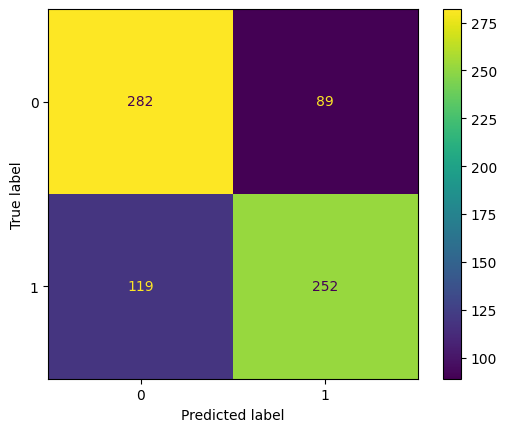

In [ ]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_).plot()

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))


              precision    recall  f1-score   support

           0       0.70      0.76      0.73       371
           1       0.74      0.68      0.71       371

    accuracy                           0.72       742
   macro avg       0.72      0.72      0.72       742
weighted avg       0.72      0.72      0.72       742



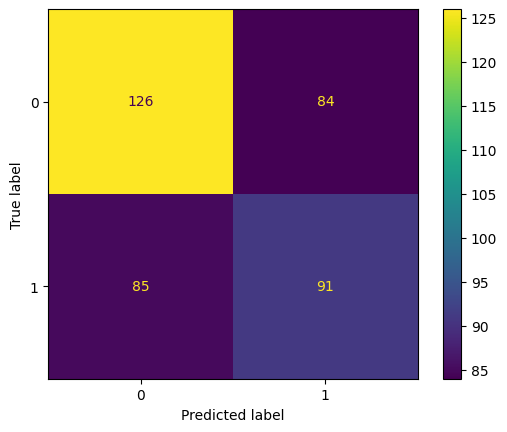

In [ ]:
#Examine the evalustion results on test data
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_).plot()

In [ ]:
#Examine the evalustion results on test data: accuracy, precision, recall, f-1
print(classification_report(target_test, prediction_on_test))


              precision    recall  f1-score   support

           0       0.60      0.60      0.60       210
           1       0.52      0.52      0.52       176

    accuracy                           0.56       386
   macro avg       0.56      0.56      0.56       386
weighted avg       0.56      0.56      0.56       386



In [ ]:
#5-fold cross validation for each model
from sklearn.model_selection import cross_val_score
# Models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=5),
    'Naive Bayes': MultinomialNB(),
    'K-NN': KNeighborsClassifier(n_neighbors=5)
}

for model_name, model in models.items():
  cv_scores = cross_val_score(model, predictors, target, cv=5, scoring='accuracy')
  print(f"{model_name} Cross-Validation Scores: {cv_scores}")
  print(f"{model_name} Mean Accuracy: {np.mean(cv_scores)}")
  print(f"{model_name} Standard Deviation: {np.std(cv_scores)}")
  print("-" * 30)

Decision Tree Cross-Validation Scores: [0.55813953 0.60311284 0.34241245 0.48249027 0.67315175]
Decision Tree Mean Accuracy: 0.5318613700117636
Decision Tree Standard Deviation: 0.11318894274864724
------------------------------
Naive Bayes Cross-Validation Scores: [0.6124031  0.47081712 0.55642023 0.54474708 0.59922179]
Naive Bayes Mean Accuracy: 0.5567218652912256
Naive Bayes Standard Deviation: 0.04985931238086876
------------------------------
K-NN Cross-Validation Scores: [0.48837209 0.57198444 0.53696498 0.52918288 0.54474708]
K-NN Mean Accuracy: 0.5342502940910324
K-NN Standard Deviation: 0.027099466962780632
------------------------------


# Model Comparison
 The Decision Tree performed the best among the three models, achieving an accuracy of 86%. The most significant variable in this model was BALLOT TYPE, followed by MEDIUM FAMILY INCOME, and POPULATION DENSITY. The recall values for class 0 (counties voting "No") were strong, with a recall of 0.92, **meaning the model was highly effective at identifying counties that voted 'No'.** The F1-score for class 0 was also high at 0.88. For class 1 (counties voting "Yes"), the model was less effective but still performed reasonably well, with a precision of 0.89 and recall of 0.78. This indicates that while the model accurately predicted many of the counties voting "Yes," it missed some, as reflected in the lower recall. Overall, the weighted average F1-score was 0.86, indicating balanced performance across both classes. To ensure the model was not overfit, the model was evaluated on train data as well, which also has an overall accuracy of .88.

The Naïve Bayes model performed poorly with an accuracy of 55%. While it had a high recall of 0.80 for class 0, indicating it captured most "No" voters, the precision for class 0 was relatively low (0.56), meaning there were many false positives. For class 1 (counties voting "Yes"), the model performed poorly with a low precision (0.51) and recall (0.25), leading to a very low F1-score of 0.33. **The model struggled to capture the complexities of the data, particularly for identifying "Yes" voters.**

The KNN model with k=5 achieved an accuracy of 56%, performing similarly for both class 0 and class 1. The precision, recall, and F1-score for both classes were close to identical, at around 0.60 for class 0 and 0.52 for class 1.
**The model was balanced but weak overall, with relatively low precision and recall for both classes, indicating a moderate number of false positives and false negatives.**
KNN’s performance can vary depending on the choice of k and feature scaling, and in this case, it did not perform as well as Decision Trees.



## Conclusion

The goal of this study was to build a model to predict whether a county would vote "yes" or "no" to legalizing gaming through a ballot using a dataset containing various demographic, economic, and religious variables. Data visualization showed how the data is distrbuted. I tried to see how the economic, racial, gender, and religious factors played a role in the outcome of the election. Data understanding helped me think about the impact of the variables on the voting outcome logically. Many of the variables were dropped due to redundancy (ex. No of church mumbers/ percentage of church members in a population) and to increase efficiency. Min-max normalization was used to scale the features.


The predictors were narrowed down to 'State No', 'BALLOT TYPE', 'POPULATION', 'PCI',
                   'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY',
                   'POPULATION DENSITY', 'PERCENT WHITE', 'PERCENT OTHER',
                   'PERCENT MALE',
                   'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
                   'UNEMPLOYMENT RATE', 'AGE24', 'AGE44',
                   'AGE64', 'AGE OLDER THAN 65', and 'MSA'.

Three classification models were developed with these predictors: Decision Trees , Naïve Bayes, and K-Nearest Neighbors. Each model was trained on a dataset of county-level voting behavior, and their performances were compared based on accuracy, recall, precision, and f-1 scores.

Based on the classification reports, Decision Tree outperformed both Naïve Bayes and KNN, achieving the highest accuracy (0.86) and F1-scores. It excelled in predicting counties that voted 'No' and performed reasonably well on counties voting 'Yes'
Naïve Bayes was the weakest model, with poor precision and recall for class 1, leading to low accuracy and F1-scores. The model struggled with the complexities of the data. KNN performed better than Naïve Bayes but still underperformed compared to Decision Trees. Its performance was balanced but weak overall.

The strengths of this study was the evaluation of the decision tree model. However there is a question of the model being overfit.

The weakness was shown in the K-NN and the Naive Bayes models. Changing the K and having a more balanced data set might help improve these models.
In conclusion, the Decision Tree model is the most suitable for predicting voting behavior in this dataset. It achieved high accuracy and F1-scores, with strong performance across both 'Yes' and 'No' classes . Naïve Bayes and KNN underperformed, with Naïve Bayes particularly struggling possibly due to its assumptions of feature independence.





In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/SiddiquiNeha_Assignment2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/SiddiquiNeha_Assignment2.ipynb to html
[NbConvertApp] Writing 1578915 bytes to /content/drive/MyDrive/Colab Notebooks/SiddiquiNeha_Assignment2.html
